## Conditional Graph

In [1]:
from typing import Literal, TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    operation1: Literal['+','-','*','/']
    operation2: Literal['+','-','*','/']
    result1: int
    result2: int

In [3]:
def addition_node_one(state: AgentState) -> AgentState:
    '''
    This node performs addition on num1 and num2.
    '''
    state['result1'] = state['num1'] + state['num2']
    return state

def subtraction_node_one(state: AgentState) -> AgentState:
    '''
    This node performs subtraction on num1 and num2.
    '''
    state['result1'] = state['num1'] - state['num2']
    return state

def addition_node_two(state: AgentState) -> AgentState:
    '''
    This node performs addition on num3 and num4.
    '''
    state['result2'] = state['num3'] + state['num4']
    return state

def subtraction_node_two(state: AgentState) -> AgentState:
    '''
    This node performs subtraction on num3 and num4.
    '''
    state['result2'] = state['num3'] - state['num4']
    return state

def router_one(state: AgentState) -> str:
    '''
    This routes the graph based on the operation.
    '''
    if state['operation1'] == '+':
        return 'addition_operation_one'
    elif state['operation1'] == '-':
        return 'subtraction_operation_one'
    
def router_two(state: AgentState) -> str:
    '''
    This routes the graph based on the operation.
    '''   
    if state['operation2'] == '+': 
        return 'addition_operation_two'
    elif state['operation2'] == '-':
        return 'subtraction_operation_two'


In [4]:
graph = StateGraph(AgentState)

graph.add_node("addition_node_first", addition_node_one)
graph.add_node("subtraction_node_first", subtraction_node_one)
graph.add_node("addition_node_second", addition_node_two)
graph.add_node("subtraction_node_second", subtraction_node_two)
graph.add_node("router_node_first", lambda state: state)
graph.add_node("router_node_second", lambda state: state)

graph.add_edge(START, "router_node_first")
graph.add_conditional_edges(
    'router_node_first',
    router_one,
    {
        'addition_operation_one': 'addition_node_first',
        'subtraction_operation_one': 'subtraction_node_first'
    }
)
graph.add_edge("addition_node_first", "router_node_second")
graph.add_edge("subtraction_node_first", "router_node_second")
graph.add_conditional_edges(
    'router_node_second',
    router_two,
    {
        'addition_operation_two': 'addition_node_second',
        'subtraction_operation_two': 'subtraction_node_second'
    }
)

graph.add_edge("addition_node_second", END)
graph.add_edge("subtraction_node_second", END)


In [5]:
app = graph.compile()

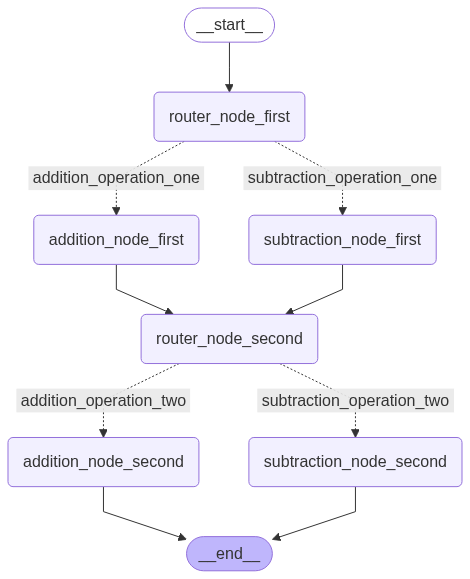

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({
    'num1': 10,
    'num2': 5,
    'operation1': '-',
    'num3': 20,
    'num4': 10,
    'operation2': '+'
})
print(f"Result: {result}")

Result: {'num1': 10, 'num2': 5, 'num3': 20, 'num4': 10, 'operation1': '-', 'operation2': '+', 'result1': 5, 'result2': 30}
